Importar libreria webdriver-manager

In [1]:

import os
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver

In [2]:
from selenium.webdriver.chrome.service import Service

In [3]:
from bs4 import BeautifulSoup

In [4]:
os.environ['WD_PATH'] = './drivers'

ruta = ChromeDriverManager().install()

service = Service(executable_path=ruta)

In [5]:
ruta

'C:\\Users\\bc.mgutierrez\\.wdm\\drivers\\chromedriver\\win64\\125.0.6422.141\\chromedriver-win32/chromedriver.exe'

In [6]:
s = Service(ruta)

In [7]:
options = webdriver.ChromeOptions()
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36")

driver = webdriver.Chrome(service=s, options=options)

In [20]:
url="https://www.flashscore.com.mx/futbol/inglaterra/premier-league/resultados/"

In [21]:
driver.get(url)

In [22]:
driver.page_source

'<html lang="es-MX"><head>\n        <meta charset="utf-8">\n        <title>Resultados Premier League 2023/2024 - Fútbol/Inglaterra  </title>\n        <script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/destination?id=AW-999393459&amp;l=dataLayer&amp;cx=c"></script><script type="text/javascript" async="" src="https://unpkg.com/web-vitals/dist/web-vitals.iife.js"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-FPBBK9FDCK&amp;l=dataLayer&amp;cx=c"></script><script async="" src="//www.googletagmanager.com/gtm.js?id=GTM-PWJ3NQ"></script><script defer="" src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript" data-document-language="true" charset="UTF-8" data-domain-script="29a8668e-8c2b-4c3f-831d-3c83380d0cfa"></script>\n        <link rel="preload" href="/x/js/core_201_2207000000.js" as="script" crossorigin="">\n        <link rel="preload" href="https://static.flashscore.com/res/im

In [50]:
 soup = BeautifulSoup(driver.page_source, "html.parser")

## Parte 2

In [8]:
import time
import logging
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [153]:
def iniciar_chrome():
    ## Inicia Chrome con los parámetros indicados y devuelve el driver
    ## Configura el nivel de registro para webdriver_manager
    logging.getLogger("webdriver_manager").setLevel(logging.ERROR)

    ## Instalamos la versión de chromedriver correspondiente. Nos devuelve la ruta completa del ejecutable
    ruta = ChromeDriverManager().install()

    ## OPCIONES DE CHROME
    options = Options()  ## Instanciamos las opciones de Chrome
    user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36"
    options.add_argument(f"user-agent={user_agent}")  # Define un user agent personalizado
    # options.add_argument("--window-size=1000,1000")  # Para configurar el alto y ancho de la ventana de chrome
    options.add_argument("--start-maximized")  # Para maximizar la ventana de chrome (solo funciona si la línea de arriba no se encuentra activa)
    options.add_argument("--disable-web-security")  # Deshabilita la política del mismo origen
    options.add_argument("--disable-notifications")  # Para bloquear las notificaciones de Chrome
    options.add_argument("--ignore-certificate-errors")  # Para ignorar el aviso "su conexión no es privada"
    options.add_argument("--no-sandbox")  # Deshabilita el modo sandbox
    options.add_argument("--log-level=3")  # Para que chrome driver no muestre nada en la terminal
    options.add_argument("--allow-running-insecure-content")  # Desactiva el aviso de "contenido no disponible"
    options.add_argument("--no-default-browser-check")  # Evita el aviso de que Chrome no es el navegador por defecto
    options.add_argument("--no-first-run")  # Evita la ejecución de ciertas tareas que se realizan la primera vez que se ejecutan
    options.add_argument("--no-proxy-server")  # Para no usar proxy, sino conexiones directas
    options.add_argument("--disable-blink-features=AutomationControlled")  # Evita que selenium sea detectado por la web
    ##PARAMETROS A OMITIR EN EL INICIO DE CHROMEDRIVER
    exp_opt = [
        'enable-automation', #Para que no muestre la notificacion "Un software automatizado de pruebas esta utilizando chrome"
        'ignore-certificate-errors',#Para ignorar errores de certificados (a veces estan caducados)
        'enable-logging'#Para que no se muestre la teriman 'DevTools listening on...'
    ]
    options.add_experimental_option("excludeSwitches", exp_opt)
    #PARAMETROS QUE DEFINENE PREFERNCIAS DE CHROMEDRIVER
    prefs = {
        "profile-default_content_setting_values.notifications" : 2, #Notificaciones: 0=preguntar | 1=permitir | 2=no permitir
        "intl.accept_languages": ["es-ES", "es"],#Para definir el idioma del navegador
        "credentials_enable_service": False #Para evir que chrome nos pregunte si queremos guardar la contraseña al logearnos
    }
    options.add_experimental_option("prefs",prefs)
    ## Instanciamos el servicio de chromedriver
    s = Service(ruta)
    ## Instanciamos webdriver de selenium en chrome
    driver = webdriver.Chrome(service=s, options=options)  # Añadimos el argumento options

    ## Devolver el driver
    return driver

# MAIN #########################################################################

if __name__ == '__main__':
    driver = iniciar_chrome()
    url= "https://www.flashscore.com.mx/futbol/inglaterra/premier-league/resultados/"
   

In [154]:
 
    locales = driver.find_elements(By.CSS_SELECTOR, "div._participant_x6lwl_4.event__homeParticipant")
    goles_locales = driver.find_elements(By.CSS_SELECTOR, "div.event__score.event__score--home")
    visitantes = driver.find_elements(By.CSS_SELECTOR, "div._participant_x6lwl_4.event__awayParticipant")
    goles_visitantes = driver.find_elements(By.CSS_SELECTOR, "div.event__score.event__score--away")
    jornadas = driver.find_elements(By.CSS_SELECTOR, "div.event__round.event__round--static")

    for i in range(len(jornadas)):
        print(f"Jornada: {jornadas[i].text}")

    i = 0 

    for i in range(len(locales)):
    # Your code to print data for each iteration
        print(f"Local: {locales[i].text} - Goles Local: {goles_locales[i].text}")
        print(f"Visitante: {visitantes[i].text} - Goles Visitante: {goles_visitantes[i].text}")

    



    #input("Pulsar ENTER para salir")


Jornada: JORNADA 38
Jornada: JORNADA 34
Jornada: JORNADA 37
Jornada: JORNADA 36
Jornada: JORNADA 26
Jornada: JORNADA 35
Jornada: JORNADA 29
Jornada: JORNADA 34
Jornada: JORNADA 33
Jornada: JORNADA 32
Jornada: JORNADA 31
Jornada: JORNADA 30
Jornada: JORNADA 29
Jornada: JORNADA 17
Jornada: JORNADA 28
Jornada: JORNADA 27
Jornada: JORNADA 26
Jornada: JORNADA 18
Jornada: JORNADA 25
Jornada: JORNADA 24
Jornada: JORNADA 23
Jornada: JORNADA 22
Jornada: JORNADA 21
Jornada: JORNADA 20
Jornada: JORNADA 19
Jornada: JORNADA 18
Jornada: JORNADA 17
Jornada: JORNADA 16
Jornada: JORNADA 15
Jornada: JORNADA 14
Jornada: JORNADA 13
Jornada: JORNADA 12
Jornada: JORNADA 11
Jornada: JORNADA 10
Jornada: JORNADA 9
Jornada: JORNADA 8
Jornada: JORNADA 2
Jornada: JORNADA 7
Jornada: JORNADA 6
Jornada: JORNADA 5
Jornada: JORNADA 4
Jornada: JORNADA 3
Jornada: JORNADA 2
Jornada: JORNADA 1
Local: Arsenal - Goles Local: 2
Visitante: Everton - Goles Visitante: 1
Local: Brentford - Goles Local: 2
Visitante: Newcastle - G

Cargar las librerias

In [22]:
import pandas as pd


In [155]:
##Iterar para sacar el texto de cada jornada, equipo, goles, recorriendo la lista de jornadas
lista_jornadas = [jornada.text for jornada in jornadas]
lista_locales = [local.text for local in locales]
lista_goles_locales = [goles_local.text for goles_local in goles_locales]
lista_visitantes = [visitante.text for visitante in visitantes]
lista_goles_visitantes = [goles_visitante.text for goles_visitante in goles_visitantes]

datos_jornadas = pd.DataFrame({
    'Jornada': lista_jornadas
})

datos_partidos = pd.DataFrame({
    'Local': lista_locales,
    'Goles Local': lista_goles_locales,
    'Visitante': lista_visitantes,
    'Goles Visitante': lista_goles_visitantes
})

print("Las jornadas son de Jornadas:")
print(datos_jornadas.head())

print("los de Detalles de Partidos:")
print(datos_partidos.head())


Las jornadas son de Jornadas:
      Jornada
0  JORNADA 38
1  JORNADA 34
2  JORNADA 37
3  JORNADA 36
4  JORNADA 26
los de Detalles de Partidos:
       Local Goles Local          Visitante Goles Visitante
0    Arsenal           2            Everton               1
1  Brentford           2          Newcastle               4
2   Brighton           0     Manchester Utd               2
3    Burnley           1  Nottingham Forest               2
4    Chelsea           2        Bournemouth               1


In [46]:
len(datos_jornadas)

44

In [47]:
len(datos_partidos)

380

In [48]:
driver.quit()


Realizamos otro rascado para obtener mas informacion relevante

In [49]:
if __name__ == '__main__':
    driver = iniciar_chrome()
    url= "https://www.flashscore.com.mx/futbol/inglaterra/premier-league/clasificacion/#/I3O5jpB2/table/overall"
   

In [69]:
# Encontrar todos los elementos ui-table__row
filas = driver.find_elements(By.CSS_SELECTOR, "div.ui-table__row")

# Definir los nombres de las columnas en el orden especificado
nombres_columnas = ["Posicion", "Equipo","PJ", "G", "E", "P", "G", "DG", "PTS", "FORMA"]

# Iterar sobre cada fila y obtener el texto
for fila in filas:
    celdas = fila.find_elements(By.CLASS_NAME, "table__cell")  # Encontrar todas las celdas de la fila
    
    # Verificar que hay suficientes celdas para evitar errores de índice
    if len(celdas) >= len(nombres_columnas):
        # Imprimir el texto correspondiente a cada nombre de columna
        for i in range(len(nombres_columnas)):
            if nombres_columnas[i] == "FORMA":
                # Unir los valores de FORMA1 a FORMA5 separados por "-"
                valores_forma = [celda.text for celda in celdas[i:i+5]]
                texto_forma = " - ".join(valores_forma)
                print(f"{nombres_columnas[i]}: {texto_forma}")
            else:
                print(f"{nombres_columnas[i]}: {celdas[i].text}")
    
    print("----------------------------------------")  # Separador opcional entre filas para mejor legibilidad

Posicion: 1.
Equipo: Manchester City
PJ: 38
G: 28
E: 7
P: 3
G: 96:34
DG: 62
PTS: 91
FORMA: G
G
G
G
G
----------------------------------------
Posicion: 2.
Equipo: Arsenal
PJ: 38
G: 28
E: 5
P: 5
G: 91:29
DG: 62
PTS: 89
FORMA: G
G
G
G
G
----------------------------------------
Posicion: 3.
Equipo: Liverpool
PJ: 38
G: 24
E: 10
P: 4
G: 86:41
DG: 45
PTS: 82
FORMA: G
E
G
E
P
----------------------------------------
Posicion: 4.
Equipo: Aston Villa
PJ: 38
G: 20
E: 8
P: 10
G: 76:61
DG: 15
PTS: 68
FORMA: P
E
P
E
G
----------------------------------------
Posicion: 5.
Equipo: Tottenham
PJ: 38
G: 20
E: 6
P: 12
G: 74:61
DG: 13
PTS: 66
FORMA: G
P
G
P
P
----------------------------------------
Posicion: 6.
Equipo: Chelsea
PJ: 38
G: 18
E: 9
P: 11
G: 77:63
DG: 14
PTS: 63
FORMA: G
G
G
G
G
----------------------------------------
Posicion: 7.
Equipo: Newcastle
PJ: 38
G: 18
E: 6
P: 14
G: 85:62
DG: 23
PTS: 60
FORMA: G
P
E
G
G
----------------------------------------
Posicion: 8.
Equipo: Manchester Utd
PJ:

Guardar la informacion en un data frame

In [88]:
nombres_columnas = ["Posicion", "Equipo", "PJ", "G", "E", "P", "G", "DG", "PTS", "FORMA"]

# Lista para almacenar los datos de cada fila
datos_filas = []

# Iterar sobre cada fila y obtener el texto
for fila in filas:
    celdas = fila.find_elements(By.CLASS_NAME, "table__cell")  # Encontrar todas las celdas de la fila
    
    # Verificar que hay suficientes celdas para evitar errores de índice
    if len(celdas) >= len(nombres_columnas):
        fila_clasificacion = {}  # Diccionario para almacenar los datos de esta fila
        
        # Obtener el texto correspondiente a cada nombre de columna
        for i in range(len(nombres_columnas)):
            if nombres_columnas[i] == "FORMA":
                # Unir los valores de FORMA1 a FORMA5 separados por "-"
                valores_forma = [celda.text for celda in celdas[i:i+5]]
                texto_forma = " . ".join(valores_forma)
                fila_clasificacion[nombres_columnas[i]] = texto_forma
            else:
                fila_clasificacion[nombres_columnas[i]] = celdas[i].text
        
        # Agregar la fila al conjunto de datos
        datos_filas.append(fila_clasificacion)

# Crear DataFrame final
df_clasificacion = pd.DataFrame(datos_filas)

# Imprimir el DataFrame para verificar
print("DataFrame de Clasificación:")
print(df_clasificacion)

DataFrame de Clasificación:
Empty DataFrame
Columns: []
Index: []


Hacemos otro rascado para obtener informacion

In [76]:
if __name__ == '__main__':
    driver = iniciar_chrome()
    url= "https://www.flashscore.com.mx/futbol/inglaterra/premier-league/clasificacion/#/I3O5jpB2/top_scorers"
   

In [80]:
filas = driver.find_elements(By.CSS_SELECTOR, '.ui-table__row.topScorers__row')

# Iterar sobre cada fila para extraer los datos
for fila in filas:
    posicion = fila.find_element(By.CSS_SELECTOR, 'span.topScorers__cell--rank.topScorers__cell.topScorers__cell--sorting').text
    jugador = fila.find_element(By.CSS_SELECTOR, '.topScorersParticipant--clickable').text
    equipo = fila.find_element(By.CSS_SELECTOR, 'a.topScorers__participantCell').text
    goles = fila.find_element(By.CSS_SELECTOR, '.topScorers__cell--goals').text
    asistencias = fila.find_element(By.CSS_SELECTOR, '.topScorers__cell:nth-child(5)').text

    # Obtener el país del jugador
    elemento_pais = fila.find_element(By.CSS_SELECTOR, '.topScorersParticipant--clickable .flag')
    pais = elemento_pais.get_attribute('title')

    # Imprimir o almacenar los datos como desees
    print(f"Posición: {posicion}, Jugador: {jugador}, País: {pais}, Equipo: {equipo}, Goles: {goles}, Asistencias: {asistencias}")

Posición: 1., Jugador: Haaland E., País: Noruega, Equipo: Manchester City, Goles: 27, Asistencias: 5
Posición: 2., Jugador: Palmer C., País: Inglaterra, Equipo: Chelsea, Goles: 22, Asistencias: 11
Posición: 3., Jugador: Isak A., País: Suecia, Equipo: Newcastle, Goles: 21, Asistencias: 2
Posición: 4., Jugador: Watkins O., País: Inglaterra, Equipo: Aston Villa, Goles: 19, Asistencias: 13
Posición: 5., Jugador: Foden P., País: Inglaterra, Equipo: Manchester City, Goles: 19, Asistencias: 8
Posición: 6., Jugador: Solanke D., País: Inglaterra, Equipo: Bournemouth, Goles: 19, Asistencias: 3
Posición: 7., Jugador: Salah M., País: Egipto, Equipo: Liverpool, Goles: 18, Asistencias: 10
Posición: 8., Jugador: Son Heung-Min, País: Corea del Sur, Equipo: Tottenham, Goles: 17, Asistencias: 10
Posición: 9., Jugador: Saka B., País: Inglaterra, Equipo: Arsenal, Goles: 16, Asistencias: 9
Posición: 10., Jugador: Bowen J., País: Inglaterra, Equipo: West Ham, Goles: 16, Asistencias: 6
Posición: 11., Jugador

In [83]:

# Crear listas vacías para cada columna
posiciones = []
jugadores = []
equipos = []
goles = []
asistencias = []
paises = []

# Iterar sobre cada fila para extraer los datos
for fila in filas:
    # Obtener los datos de cada columna
    posicion = fila.find_element(By.CSS_SELECTOR, 'span.topScorers__cell--rank.topScorers__cell.topScorers__cell--sorting').text
    jugador = fila.find_element(By.CSS_SELECTOR, '.topScorersParticipant--clickable').text
    equipo = fila.find_element(By.CSS_SELECTOR, 'a.topScorers__participantCell').text
    gol = fila.find_element(By.CSS_SELECTOR, '.topScorers__cell--goals').text
    asistencia = fila.find_element(By.CSS_SELECTOR, '.topScorers__cell:nth-child(5)').text

    # Obtener el país del jugador
    elemento_pais = fila.find_element(By.CSS_SELECTOR, '.topScorersParticipant--clickable .flag')
    pais = elemento_pais.get_attribute('title')

    # Agregar los datos a las listas correspondientes
    posiciones.append(posicion)
    jugadores.append(jugador)
    equipos.append(equipo)
    goles.append(gol)
    asistencias.append(asistencia)
    paises.append(pais)

# Crear el DataFrame usando pandas
Goleadores = {
    'Posición': posiciones,
    'Jugador': jugadores,
    'País': paises,
    'Equipo': equipos,
    'Goles': goles,
    'Asistencias': asistencias
}

goleadores = pd.DataFrame(Goleadores)

# Mostrar el DataFrame
print(goleadores)


    Posición        Jugador        País             Equipo Goles Asistencias
0         1.     Haaland E.     Noruega    Manchester City    27           5
1         2.      Palmer C.  Inglaterra            Chelsea    22          11
2         3.        Isak A.      Suecia          Newcastle    21           2
3         4.     Watkins O.  Inglaterra        Aston Villa    19          13
4         5.       Foden P.  Inglaterra    Manchester City    19           8
..       ...            ...         ...                ...   ...         ...
359     330.     Roberts C.       Gales            Burnley     0           1
360     330.      Semedo N.    Portugal             Wolves     0           1
361     330.  Smith Rowe E.  Inglaterra            Arsenal     0           1
362     330.        Ward J.  Inglaterra     Crystal Palace     0           1
363     330.    Williams N.       Gales  Nottingham Forest     0           1

[364 rows x 6 columns]


In [84]:
len(goleadores)

364

# Analisis Exploratorio de Datos

Exploramos los data frames que tenemos

In [148]:
datos_jornadas

,Jornada
0,JORNADA 38
1,JORNADA 34
2,JORNADA 37
3,JORNADA 36
4,JORNADA 26
5,JORNADA 35
6,JORNADA 29
7,JORNADA 34
8,JORNADA 33
9,JORNADA 32


In [149]:
datos_partidos

,Posición,Jugador,País,Equipo,Goles,Asistencias
0,1.,Haaland E.,Noruega,Manchester City,27,5
1,2.,Palmer C.,Inglaterra,Chelsea,22,11
2,3.,Isak A.,Suecia,Newcastle,21,2
3,4.,Watkins O.,Inglaterra,Aston Villa,19,13
4,5.,Foden P.,Inglaterra,Manchester City,19,8
...,...,...,...,...,...,...
359,330.,Roberts C.,Gales,Burnley,0,1
360,330.,Semedo N.,Portugal,Wolves,0,1
361,330.,Smith Rowe E.,Inglaterra,Arsenal,0,1
362,330.,Ward J.,Inglaterra,Crystal Palace,0,1


In [150]:
df_clasificacion
clasificacion=df_clasificacion

In [151]:
clasificacion

,Posicion,Equipo,PJ,G,E,P,DG,PTS,FORMA
0,1.,Manchester City,38,96:34,7,3,62,91,G\nG\nG\nG\nG
1,2.,Arsenal,38,91:29,5,5,62,89,G\nG\nG\nG\nG
2,3.,Liverpool,38,86:41,10,4,45,82,G\nE\nG\nE\nP
3,4.,Aston Villa,38,76:61,8,10,15,68,P\nE\nP\nE\nG
4,5.,Tottenham,38,74:61,6,12,13,66,G\nP\nG\nP\nP
5,6.,Chelsea,38,77:63,9,11,14,63,G\nG\nG\nG\nG
6,7.,Newcastle,38,85:62,6,14,23,60,G\nP\nE\nG\nG
7,8.,Manchester Utd,38,57:58,6,14,-1,60,G\nG\nP\nP\nE
8,9.,West Ham,38,60:74,10,14,-14,52,P\nG\nP\nE\nP
9,10.,Crystal Palace,38,57:58,10,15,-1,49,G\nG\nG\nE\nG


In [152]:
goleadores

,Posición,Jugador,País,Equipo,Goles,Asistencias
0,1.,Haaland E.,Noruega,Manchester City,27,5
1,2.,Palmer C.,Inglaterra,Chelsea,22,11
2,3.,Isak A.,Suecia,Newcastle,21,2
3,4.,Watkins O.,Inglaterra,Aston Villa,19,13
4,5.,Foden P.,Inglaterra,Manchester City,19,8
...,...,...,...,...,...,...
359,330.,Roberts C.,Gales,Burnley,0,1
360,330.,Semedo N.,Portugal,Wolves,0,1
361,330.,Smith Rowe E.,Inglaterra,Arsenal,0,1
362,330.,Ward J.,Inglaterra,Crystal Palace,0,1


## Limpieza de datos

In [93]:
#Cargamos librerias
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

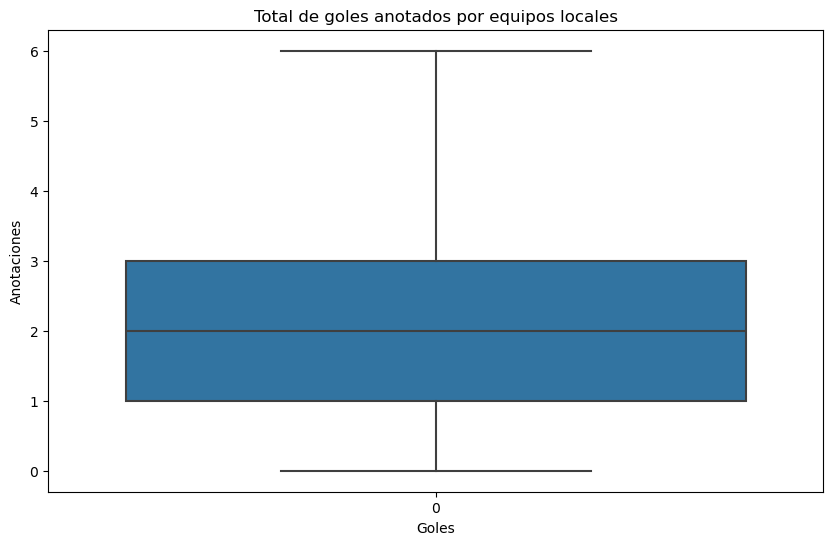

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(data=datos_partidos["Goles Local"])
plt.title("Total de goles anotados por equipos locales")
plt.xlabel("Goles")
plt.ylabel("Anotaciones")
plt.show()

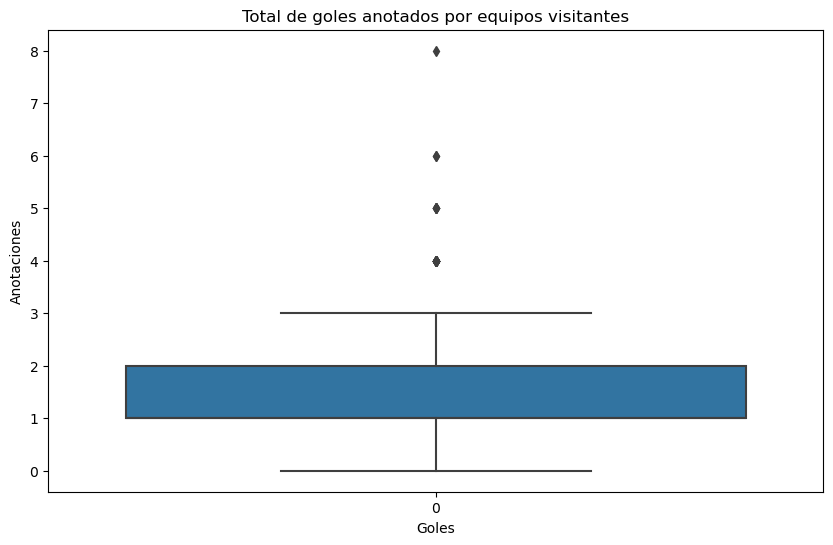

In [97]:
plt.figure(figsize=(10,6))
sns.boxplot(data=datos_partidos["Goles Visitante"])
plt.title("Total de goles anotados por equipos visitantes")
plt.xlabel("Goles")
plt.ylabel("Anotaciones")
plt.show()

verificar que no haya valores nulos

In [98]:
datos_partidos.isnull().sum()

Local              0
Goles Local        0
Visitante          0
Goles Visitante    0
dtype: int64

In [101]:
clasificacion.isnull().sum()

Posicion    0
Equipo      0
PJ          0
G           0
E           0
P           0
DG          0
PTS         0
FORMA       0
dtype: int64

In [102]:
goleadores.isnull().sum(

Posición       0
Jugador        0
País           0
Equipo         0
Goles          0
Asistencias    0
dtype: int64

In [110]:
print(datos_partidos['Goles Visitante'].dtype)

object


In [118]:
datos_partidos['Goles Visitante'] = pd.to_numeric(datos_partidos['Goles Visitante'])
print(datos_partidos['Goles Visitante'].dtype)

int64


In [133]:
datos_partidos['Goles Local'] = pd.to_numeric(datos_partidos['Goles Local'])


In [132]:
datos_partidos.columns

Index(['Local', 'Goles Local', 'Visitante', 'Goles Visitante'], dtype='object')

Tratamiento de valores atipicos

In [119]:
Q1=datos_partidos["Goles Visitante"].quantile(0.25)
Q3=datos_partidos["Goles Visitante"].quantile(0.75)
IQR=Q3-Q1
Mediana=datos_partidos["Goles Visitante"].median()
Media=datos_partidos["Goles Visitante"].mean()
Minimo=datos_partidos["Goles Visitante"].min()
Maximo=datos_partidos["Goles Visitante"].max()

print("Primer cuartil: ", Q1)
print("Tercer cuartil: ", Q3)
print("Rango intercuartil: ", IQR)
print("Mediana : ", Mediana)
print("Media : ", Media)
print("Minimo : ", Minimo)
print("Maximo : ", Maximo)



Primer cuartil:  1.0
Tercer cuartil:  2.0
Rango intercuartil:  1.0
Mediana :  1.0
Media :  1.4789473684210526
Minimo :  0
Maximo :  8


In [120]:
BI= (Q1 - 1.5 * IQR)
BS= (Q3 + 1.5 * IQR)
print("El bigote inferior es:", BI)
print("El bigote superior es:", BS)

El bigote inferior es: -0.5
El bigote superior es: 3.5


In [122]:
Ubicacion_outliers= (datos_partidos["Goles Visitante"]<BI) | (datos_partidos["Goles Visitante"] > BS)
Total_outliers= Ubicacion_outliers.sum()
print("\n Numero total de outliers: ", Total_outliers)
print("\n Ubicacion de los outliers: ", Ubicacion_outliers)


 Numero total de outliers:  28

 Ubicacion de los outliers:  0      False
1       True
2      False
3      False
4      False
       ...  
375    False
376    False
377    False
378    False
379    False
Name: Goles Visitante, Length: 380, dtype: bool


In [123]:
Outliers = datos_partidos["Goles Visitante"]
print("/n Filas con outliers /n", Outliers)

/n Filas con outliers /n 0      1
1      4
2      2
3      2
4      1
      ..
375    1
376    1
377    1
378    1
379    3
Name: Goles Visitante, Length: 380, dtype: int64


In [131]:
sin_outliers=(datos_partidos["Goles Visitante"]>=BI) & (datos_partidos["Goles Visitante"] <=BS)
datos_partidos=datos_partidos[sin_outliers]
datos_partidos

,Local,Goles Local,Visitante,Goles Visitante
0,Arsenal,2,Everton,1
2,Brighton,0,Manchester Utd,2
3,Burnley,1,Nottingham Forest,2
4,Chelsea,2,Bournemouth,1
5,Crystal Palace,5,Aston Villa,0
...,...,...,...,...
375,Brighton,4,Luton,1
376,Everton,0,Fulham,1
377,Sheffield Utd,0,Crystal Palace,1
378,Arsenal,2,Nottingham Forest,1


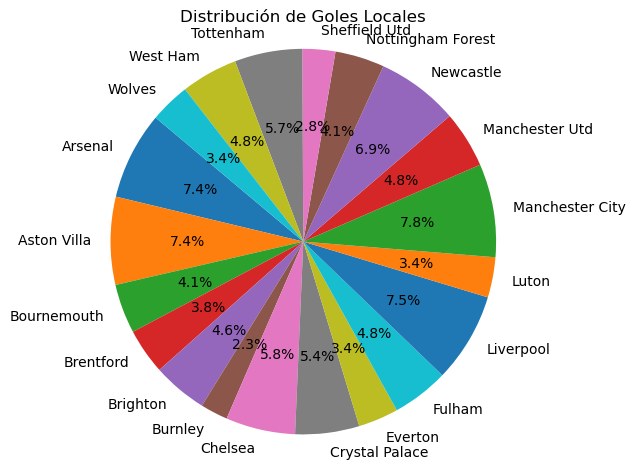

In [138]:
# Crear figura y ejes
fig, ax = plt.subplots()

# Calcular totales de goles locales por equipo
totales_goles_locales = datos_partidos.groupby('Local')['Goles Local'].sum()

# Graficar gráfico de pastel
ax.pie(totales_goles_locales, labels=totales_goles_locales.index, autopct='%1.1f%%', startangle=140)

# Configurar título
ax.set_title('Distribución de Goles Locales')

# Mostrar gráfico
plt.axis('equal')
plt.tight_layout()
plt.show()


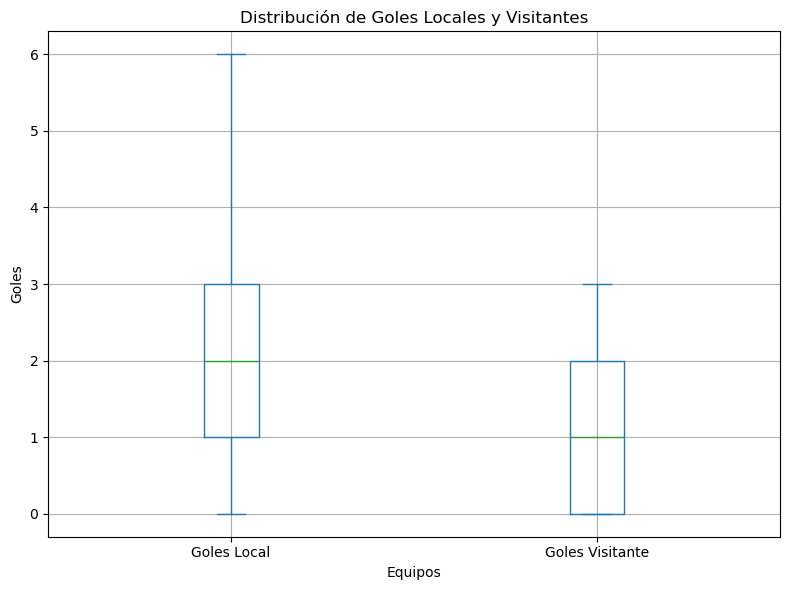

In [139]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar boxplot de Goles Locales y Goles Visitantes
datos_partidos[['Goles Local', 'Goles Visitante']].plot(kind='box', ax=ax)

# Configurar etiquetas y título
ax.set_xlabel('Equipos')
ax.set_ylabel('Goles')
ax.set_title('Distribución de Goles Locales y Visitantes')

# Mostrar gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

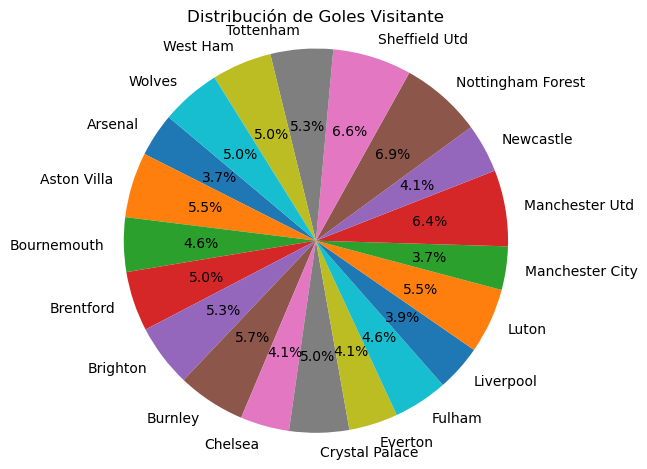

In [141]:
# Crear figura y ejes
fig, ax = plt.subplots()

# Calcular totales de goles locales por equipo
totales_goles_locales = datos_partidos.groupby('Local')['Goles Visitante'].sum()

# Graficar gráfico de pastel
ax.pie(totales_goles_locales, labels=totales_goles_locales.index, autopct='%1.1f%%', startangle=140)

# Configurar título
ax.set_title('Distribución de Goles Visitante')

# Mostrar gráfico
plt.axis('equal')
plt.tight_layout()
plt.show()


In [140]:

# Unir las columnas 'Local' y 'Visitante' y eliminar duplicados
equipos_partidos = pd.concat([datos_partidos['Local'], datos_partidos['Visitante']]).unique()

# Mostrar la lista de equipos
print("Equipos presentes en los partidos:")
for equipo in equipos_partidos:
    print(equipo)

Equipos presentes en los partidos:
Arsenal
Brighton
Burnley
Chelsea
Crystal Palace
Liverpool
Manchester City
Sheffield Utd
Manchester Utd
Tottenham
Aston Villa
Nottingham Forest
Bournemouth
Everton
Newcastle
West Ham
Wolves
Brentford
Luton
Fulham
Liverpool
2


C:\Users\bc.mgutierrez\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bc.mgutierrez\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


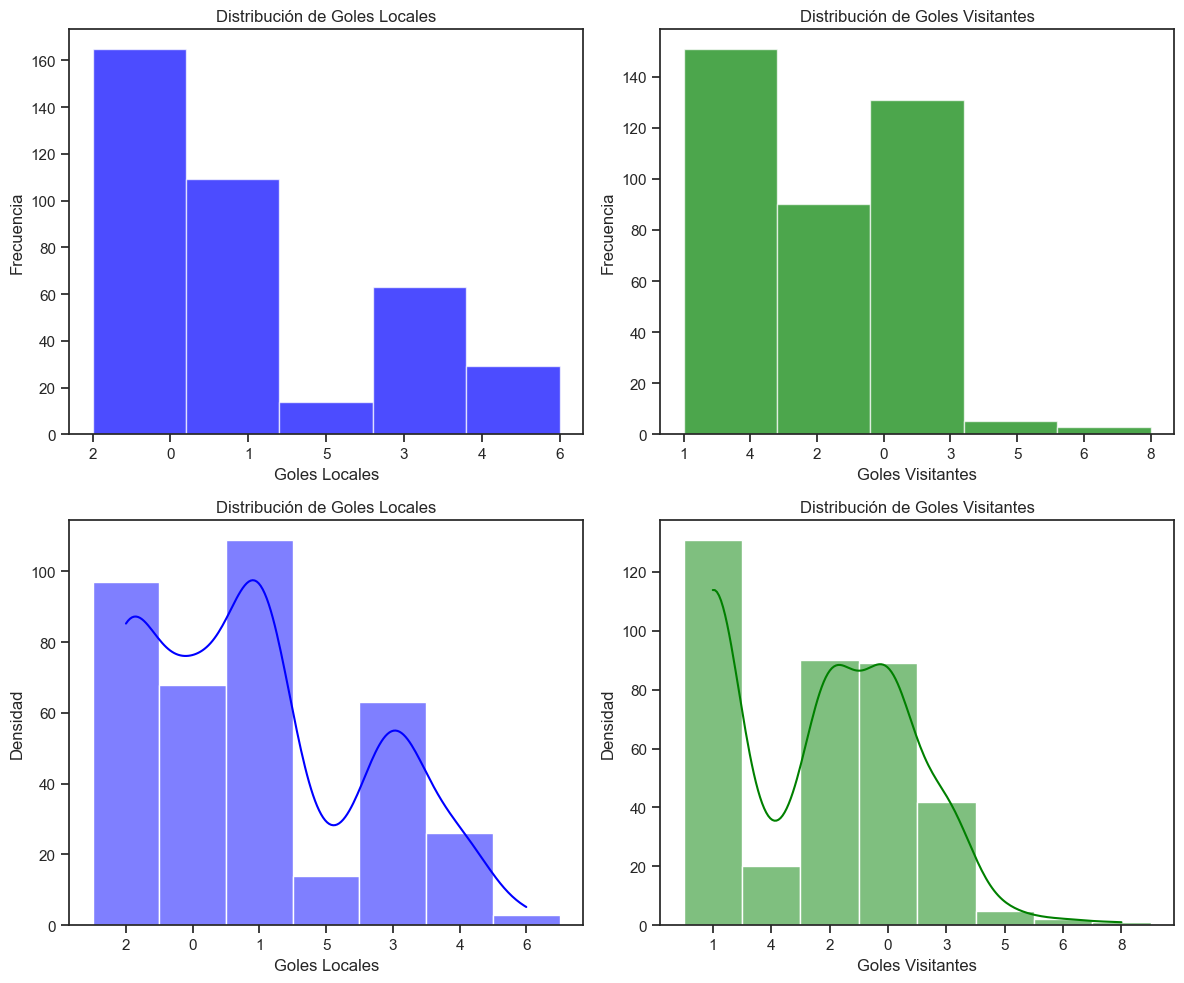

In [159]:
# Crear subplots para combinar varios gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histograma de goles locales
axes[0, 0].hist(datos_partidos['Goles Local'], bins=5, color='blue', alpha=0.7)
axes[0, 0].set_xlabel('Goles Locales')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Goles Locales')

# Histograma de goles visitantes
axes[0, 1].hist(datos_partidos['Goles Visitante'], bins=5, color='green', alpha=0.7)
axes[0, 1].set_xlabel('Goles Visitantes')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de Goles Visitantes')

# Gráfico de densidad de goles locales
sns.histplot(datos_partidos['Goles Local'], kde=True, color='blue', ax=axes[1, 0])
axes[1, 0].set_xlabel('Goles Locales')
axes[1, 0].set_ylabel('Densidad')
axes[1, 0].set_title('Distribución de Goles Locales')

# Gráfico de densidad de goles visitantes
sns.histplot(datos_partidos['Goles Visitante'], kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_xlabel('Goles Visitantes')
axes[1, 1].set_ylabel('Densidad')
axes[1, 1].set_title('Distribución de Goles Visitantes')

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()


Predecir

In [160]:
print(datos_partidos.head())


       Local Goles Local          Visitante Goles Visitante
0    Arsenal           2            Everton               1
1  Brentford           2          Newcastle               4
2   Brighton           0     Manchester Utd               2
3    Burnley           1  Nottingham Forest               2
4    Chelsea           2        Bournemouth               1


In [1]:
# Función para determinar el resultado del partido
# Gano local=1
# Gamo visitante= 2
# Empate = 3
def determinar_resultado(row):
    if row['Goles Local'] > row['Goles Visitante']:
        return 1
    elif row['Goles Visitante'] > row['Goles Local']:
        return 2
    else:
        return 3

datos_partidos['Resultado'] = datos_partidos.apply(determinar_resultado, axis=1)
datos_partidos['Gano Local'] = datos_partidos['Resultado'].apply(lambda x: 1 if x == 'Gano Local' else 0)
datos_partidos['Gano Visitante'] = datos_partidos['Resultado'].apply(lambda x: 1 if x == 'Gano Visitante' else 0)
datos_partidos['Empate'] = datos_partidos['Resultado'].apply(lambda x: 1 if x == 'Empate' else 0)

# Mostrar el DataFrame resultante
datos_partidos

NameError: name 'datos_partidos' is not defined

<Axes: xlabel='Goles Local', ylabel='Resultado'>

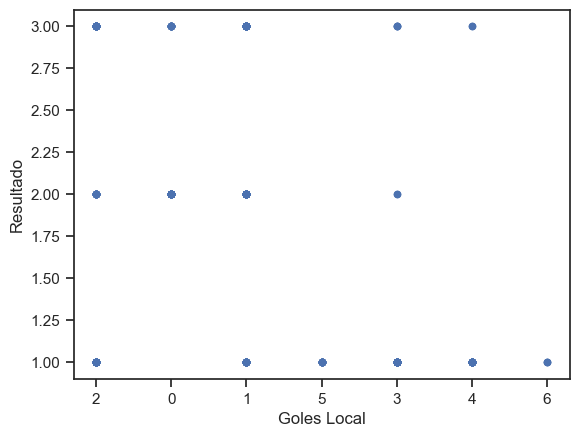

In [168]:
datos_partidos[['Goles Local','Resultado']].plot.scatter(x='Goles Local',y='Resultado')

In [178]:
resultados_unicos = datos_partidos['Resultado'].unique().tolist()
conteo_resultados = datos_partidos['Resultado'].value_counts().tolist()
print(resultados_unicos)
print(conteo_resultados)


[1, 2, 3]
[175, 123, 82]


In [192]:
mask = (datos_partidos['Resultado'] != 3)

# Aplicar la máscara para eliminar las filas que cumplen la condición
resultado_partidos_sin_empate = datos_partidos[mask]


<Axes: xlabel='Goles Visitante', ylabel='Resultado'>

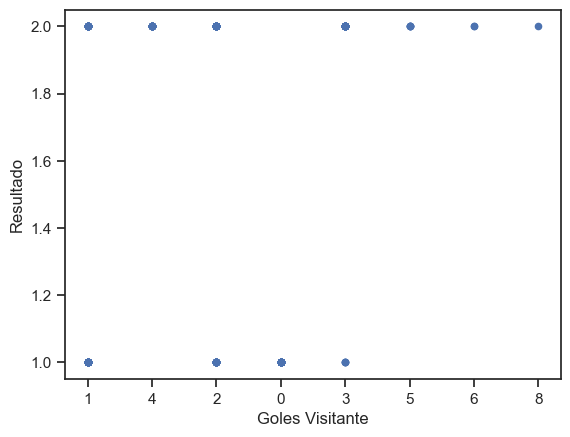

In [187]:
resultado_partidos_sin_empate[['Goles Visitante','Resultado']].plot.scatter(x='Goles Visitante',y='Resultado')

In [193]:
resultado_partidos_sin_empate = resultado_partidos_sin_empate[resultado_partidos_sin_empate['Local'] != "2"]

# Convertir la columna 'Local' a tipo categórico y luego a códigos numéricos
resultado_partidos_sin_empate['Local_numerico'] = resultado_partidos_sin_empate['Local'].astype('category').cat.codes

# Obtener los nombres de los equipos correspondientes a los códigos numéricos
equipos = resultado_partidos_sin_empate['Local'].astype('category').cat.categories

# Imprimir el resultado
for codigo, equipo in enumerate(equipos):
    print(f"Código {codigo} -> Equipo: {equipo}")

Código 0 -> Equipo: Arsenal
Código 1 -> Equipo: Aston Villa
Código 2 -> Equipo: Bournemouth
Código 3 -> Equipo: Brentford
Código 4 -> Equipo: Brighton
Código 5 -> Equipo: Burnley
Código 6 -> Equipo: Chelsea
Código 7 -> Equipo: Crystal Palace
Código 8 -> Equipo: Everton
Código 9 -> Equipo: Fulham
Código 10 -> Equipo: Liverpool
Código 11 -> Equipo: Luton
Código 12 -> Equipo: Manchester City
Código 13 -> Equipo: Manchester Utd
Código 14 -> Equipo: Newcastle
Código 15 -> Equipo: Nottingham Forest
Código 16 -> Equipo: Sheffield Utd
Código 17 -> Equipo: Tottenham
Código 18 -> Equipo: Tottenham
2
Código 19 -> Equipo: West Ham
Código 20 -> Equipo: Wolves


<Axes: xlabel='Goles Local', ylabel='Resultado'>

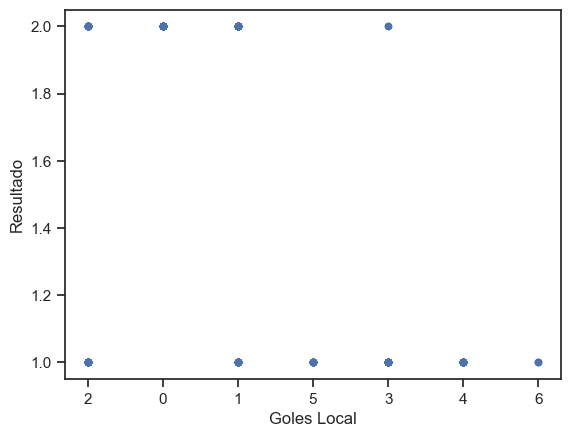

In [199]:
X = resultado_partidos_sin_empate[['Goles Local', 'Goles Visitante']]
resultado_partidos_sin_empate[['Goles Local','Resultado']].plot.scatter(x='Goles Local',y='Resultado')

In [204]:
resultado_partidos_sin_empate['Goles Visitante'] = pd.to_numeric(resultado_partidos_sin_empate['Goles Visitante'])
resultado_partidos_sin_empate['Goles Local'] = pd.to_numeric(resultado_partidos_sin_empate['Goles Local'])

resultado_partidos_sin_empate['Dif_Goles'] = resultado_partidos_sin_empate['Goles Local'] - resultado_partidos_sin_empate['Goles Visitante']
resultado_partidos_sin_empate

,Local,Goles Local,Visitante,Goles Visitante,Resultado,Gano Local,Gano Visitante,Empate,Local_numerico,Dif_Goles
0,Arsenal,2,Everton,1,1,0,0,0,0,1
1,Brentford,2,Newcastle,4,2,0,0,0,3,-2
2,Brighton,0,Manchester Utd,2,2,0,0,0,4,-2
3,Burnley,1,Nottingham Forest,2,2,0,0,0,5,-1
4,Chelsea,2,Bournemouth,1,1,0,0,0,6,1
...,...,...,...,...,...,...,...,...,...,...
375,Brighton,4,Luton,1,1,0,0,0,4,3
376,Everton,0,Fulham,1,2,0,0,0,8,-1
377,Sheffield Utd,0,Crystal Palace,1,2,0,0,0,16,-1
378,Arsenal,2,Nottingham Forest,1,1,0,0,0,0,1


<Axes: xlabel='Dif_Goles', ylabel='Resultado'>

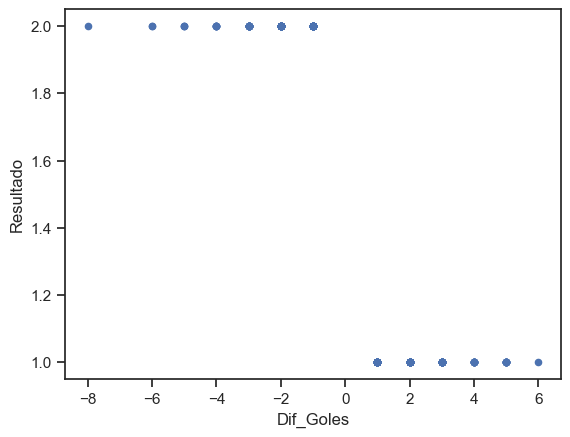

In [205]:
resultado_partidos_sin_empate[['Dif_Goles','Resultado']].plot.scatter(x='Dif_Goles',y='Resultado')

In [1]:
datos_partidos.to_csv(datos_partido,index=false)

NameError: name 'datos_partidos' is not defined

In [4]:
goleadores

NameError: name 'goleadores' is not defined